In [1]:
!pip install -U pynwb
from pynwb import NWBHDF5IO
!pip install nwbwidgets
from nwbwidgets import nwb2widget
from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# opening ecephys probe file
!ls
filepath = '/Users/poggi/Documents/Maier Lab/NWB Data/sub-699733573_ses-715093703_probe-810755797_ecephys.nwb'
io = NWBHDF5IO(filepath, 'r',load_namespaces = True)  # open the file in read mode 'r'
nwb = io.read() # nwb dataset

3lfps_random.png
5 neuron possible states figure.png
6 neuron possible states figure.png
All Probes
All Probes Data
All Probes Data Alpha
Anova Results
Band_Pass_Filters.ipynb
BinarizedStateSpace.png
Clean Data 3
Clean Data 4
Cleaned Data
Cleaned Data 2
Cleaned Data 2 Alpha
Consciousness_Calculator_3Neurons.ipynb
Consciousness_Calculator_LFP.ipynb
Consciousness_Calculator_LFP_2.0.ipynb
Correct_State_by_State_Transition_Matrix_3Neurons_five_secs.png
Dax_NWB_applied_to_IIT.py
File_Opener.ipynb
High_Pass_Filter.ipynb
Iterating Over Permutations of Binary List.ipynb
Pax_Consciousness_Calculator.ipynb
Pax_Consciousness_Calculator_3Spikes.ipynb
Pax_Consciousness_Calculator_5Spikes.ipynb
Pax_NWB_applied_to_IIT.py
Phi Scatter Plots
Phi Stats
Phi_Values_Graph.ipynb
Phi_Values_Many_Graph.ipynb
PossibleStates.png
PossibleStates_3Neurons.png
PossibleStates_4Neurons.png
TPM3.png
TPM_3Neurons_five_secs_revrocket.png
TPM_50_bin.png
TPM_yellow_blue.png
TPM_yellow_blue_4 nodes 20 seconds.png
TPM_yellow

/Users/poggi/miniconda3/envs/pyphi_lfp/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/poggi/miniconda3/envs/pyphi_lfp/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [3]:
lfp_data = nwb.acquisition
lfp_data = lfp_data['probe_810755797_lfp_data']
lfp_data = lfp_data.data
lfp_df = pd.DataFrame(lfp_data)
shape = lfp_df.shape
print(shape)
# determine the group name
group_name = nwb.electrodes['group_name'][0]
# get sampling rate
sampling_rate = nwb.electrode_groups[group_name].lfp_sampling_rate
print(sampling_rate)

(10715666, 93)
624.9990592926175


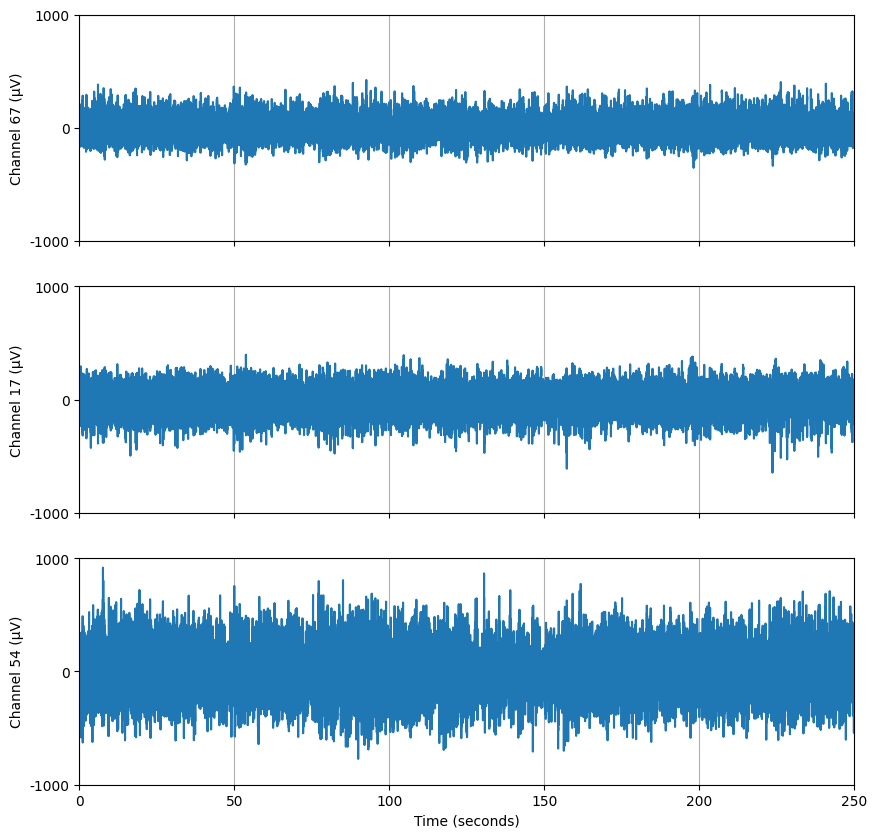

In [4]:
# Convert the desired time range in seconds to indices
start_time_seconds = 0
end_time_seconds = 250  # 5 seconds
start_index = int(start_time_seconds * sampling_rate)
end_index = int(end_time_seconds * sampling_rate)

# Slice the LFP data
lfp_data_sliced = lfp_df.iloc[start_index:end_index]

# Select three random channels
num_channels = 3
all_channels = lfp_data_sliced.columns.tolist()
random_channels = random.sample(all_channels, num_channels)

# Slice the data for the selected random channels
lfp_data_sliced_random = lfp_data_sliced[random_channels]

# Create a time array for the x-axis
time_array = np.arange(start_time_seconds, end_time_seconds, 1 / sampling_rate)[:len(lfp_data_sliced_random)]

# graph the three channels
fig, ax = plt.subplots(num_channels, 1, figsize=(10, 10), sharex=True)
for i in range(num_channels):
    ax[i].plot(time_array, lfp_data_sliced_random.iloc[:, i])
    ax[i].set_ylabel('Channel {} (µV)'.format(random_channels[i]))
    ax[i].set_xlim([start_time_seconds, end_time_seconds])
    ax[i].set_ylim([-.001, .001])
    ax[i].set_yticks([-.001, 0, .001])
    ax[i].set_yticklabels([-1000, 0, 1000])
    ax[i].grid(True)
ax[i].set_xlabel('Time (seconds)')
# save figure
plt.savefig('lfp_data_sliced_random.png')
plt.show()

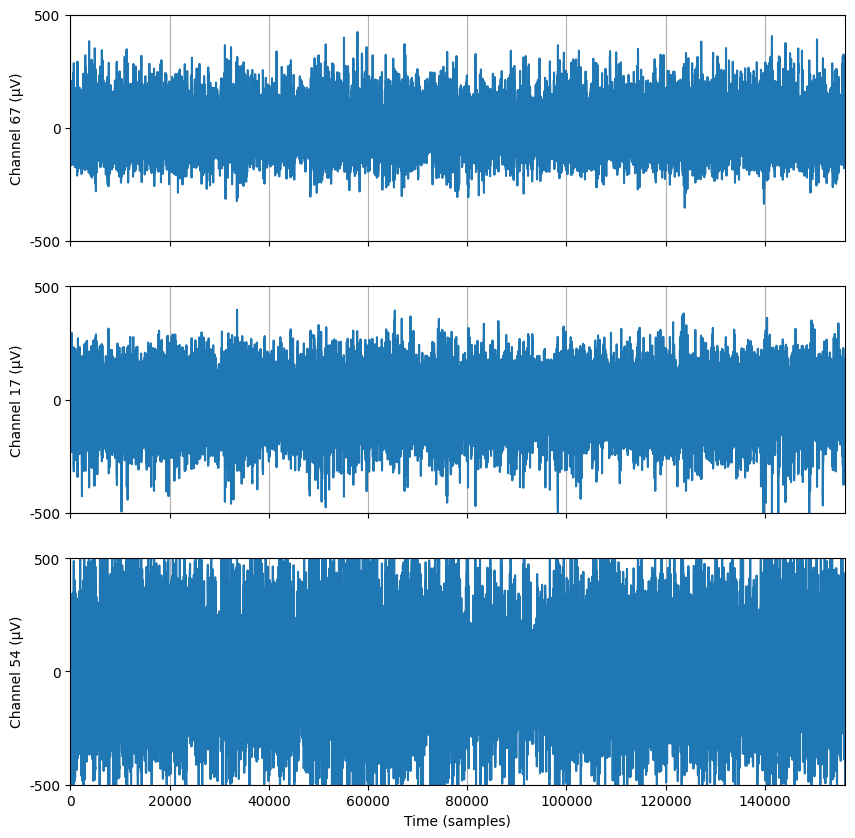

In [5]:
# graph the three channels
fig, ax = plt.subplots(num_channels, 1, figsize=(10, 10), sharex=True)
for i in range(num_channels):
    ax[i].plot(lfp_data_sliced_random.iloc[:, i])
    ax[i].set_ylabel('Channel {} (µV)'.format(random_channels[i]))
    ax[i].set_xlim([start_index, end_index])
    ax[i].set_ylim([-.0005, .0005])
    ax[i].set_yticks([-.0005, 0, .0005])
    ax[i].set_yticklabels([-500, 0, 500])
    ax[i].grid(True)
ax[i].set_xlabel('Time (samples)')
plt.show()

In [6]:
from scipy.signal import butter, filtfilt
import numpy as np

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    y_abs = np.abs(y)
    return y_abs

# Retrieve the sampling rate from the NWB file
sampling_rate = nwb.electrode_groups['probeA'].lfp_sampling_rate
print(sampling_rate)
# Apply bandpass filter to each of the random channels separately
filtered_lfp_sliced_random = lfp_data_sliced_random.apply(lambda x: bandpass_filter(x, lowcut=8, highcut=12, fs=sampling_rate))
print(filtered_lfp_sliced_random.head())

624.9990592926175
             67            17        54
0  1.790101e-06  4.470534e-06  0.000006
1  8.185881e-07  2.474469e-06  0.000015
2  3.417152e-06  4.754488e-07  0.000023
3  5.978929e-06  1.504690e-06  0.000031
4  8.477686e-06  3.444532e-06  0.000039


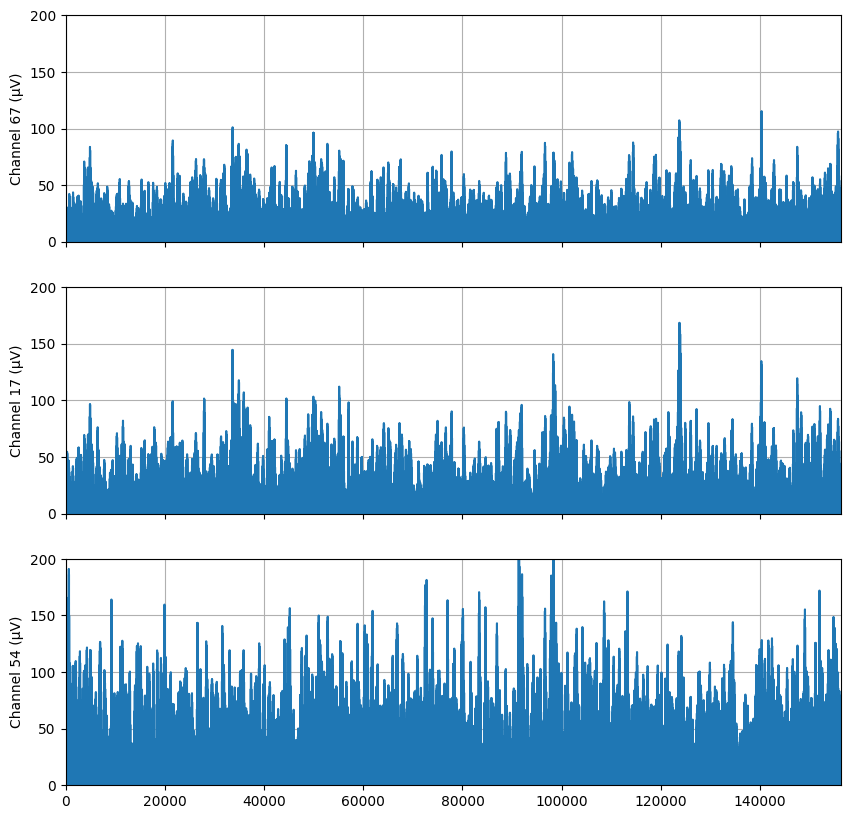

In [7]:
# graph the three channels
fig, ax = plt.subplots(num_channels, 1, figsize=(10, 10), sharex=True)
for i in range(num_channels):
    ax[i].plot(filtered_lfp_sliced_random.iloc[:, i])
    ax[i].set_ylabel('Channel {} (µV)'.format(random_channels[i]))
    ax[i].set_xlim([start_index, end_index])
    ax[i].set_ylim([0, .0002])
    ax[i].set_yticks([0, .00005, .0001, .00015, .0002])
    ax[i].set_yticklabels([0, 50, 100, 150, 200])
    ax[i].grid(True)
# save figure
plt.savefig('lfp_data_sliced_random_filtered_alpha.png')

In [8]:
# Apply bandpass filter to each of the random channels separately
filtered_lfp_sliced_random = lfp_data_sliced_random.apply(lambda x: bandpass_filter(x, lowcut=35, highcut=65, fs=sampling_rate))
print(filtered_lfp_sliced_random.head())

         67        17        54
0  0.000003  0.000002  0.000005
1  0.000006  0.000006  0.000003
2  0.000011  0.000009  0.000010
3  0.000012  0.000010  0.000012
4  0.000008  0.000010  0.000009


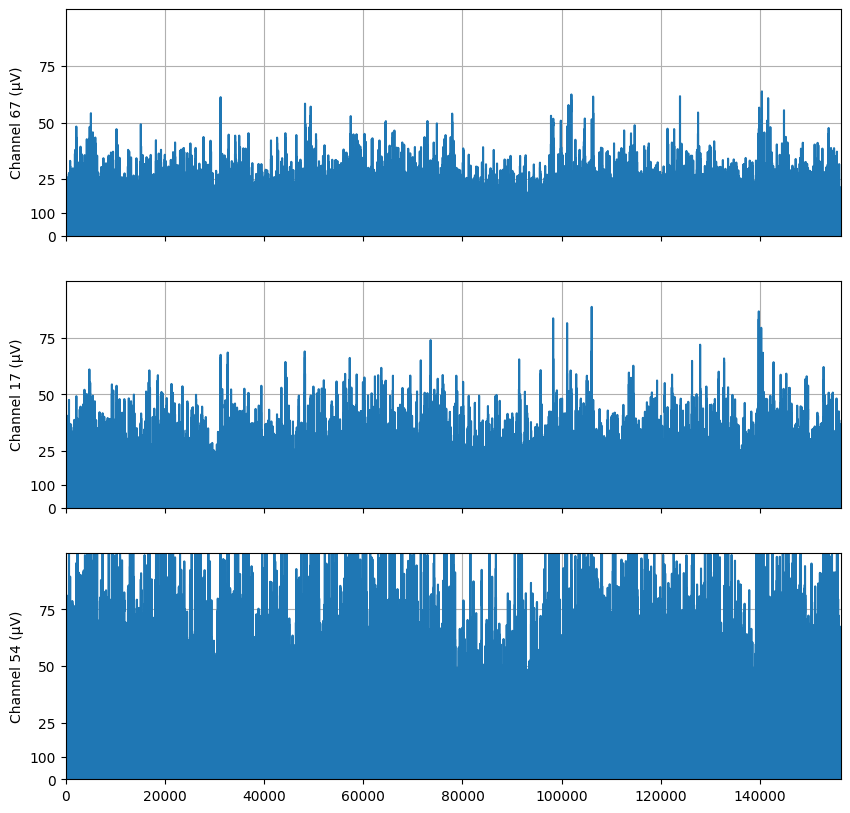

In [9]:
# graph the three channels
fig, ax = plt.subplots(num_channels, 1, figsize=(10, 10), sharex=True)
for i in range(num_channels):
    ax[i].plot(filtered_lfp_sliced_random.iloc[:, i])
    ax[i].set_ylabel('Channel {} (µV)'.format(random_channels[i]))
    ax[i].set_xlim([start_index, end_index])
    ax[i].set_ylim([0, .0001])
    ax[i].set_yticks([0, .000025, .00005, .000075, .00001])
    ax[i].set_yticklabels([0, 25, 50, 75, 100])
    ax[i].grid(True)
# save figure
plt.savefig('lfp_data_sliced_random_filtered_gamma.png')

In [10]:
# channel 91
# channel 87
# channel 83

/var/folders/16/3sjk82b95wj4m_sct3hj3kmr0000gn/T/ipykernel_42646/3038347728.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


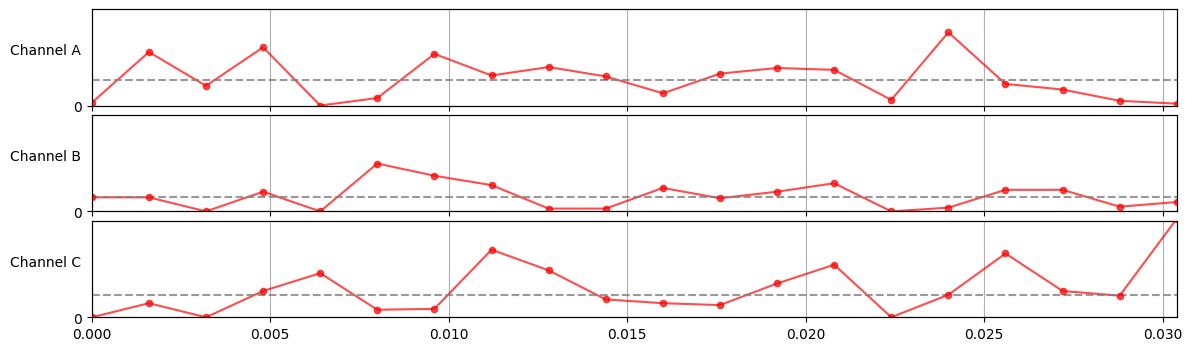

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Convert the desired time range in seconds to indices
start_time_seconds = 0
end_time_seconds = 250  # 250 seconds
start_index = int(start_time_seconds * sampling_rate)
end_index = int(end_time_seconds * sampling_rate)

# Step 2: Slice the LFP data
lfp_data_sliced = lfp_df.iloc[start_index:end_index]

# Step 3: Select specific channels (91, 87, and 83)
selected_channels = [91, 87, 83]
lfp_data_sliced_random = lfp_data_sliced[selected_channels]

# Step 4: Take the absolute value of the LFP data
lfp_data_sliced_random_abs = np.abs(lfp_data_sliced_random)

# Step 5: Create a time array for the x-axis
time_array = np.arange(start_time_seconds, end_time_seconds, 1 / sampling_rate)[:20]  # Only first twenty time samples

# Step 6: Calculate the median value for each channel for the absolute values of the first twenty time samples
median_values = np.median(lfp_data_sliced_random_abs[:20], axis=0)
median_lines = np.tile(median_values[:, np.newaxis], (1, len(time_array)))

# Step 7: Create subplots and plot the data and median lines for each channel
fig, axs = plt.subplots(len(selected_channels), 1, figsize=(14, 4), sharex=True, gridspec_kw={'hspace': 0.1})

for i, channel_idx in enumerate(selected_channels):
    ax = axs[i]

    # Plot the LFP data for the channel
    ax.plot(time_array, lfp_data_sliced_random_abs[channel_idx][:20], color='red', alpha=0.7)

    # Plot the median line for the channel
    ax.plot(time_array, median_lines[i], color='grey', linestyle='--', label=f"Median of Channel {chr(65+i)}", alpha=0.8)

    # relabel y ticks from 0 to 25 in increments of 5
    ax.set_yticks(np.arange(0, 25, 5))
    # Set the right-side y-axis scale from 0 to 20 microvolts
    ax.set_ylim(0, .00002)


    # Label the left y-axis with "Channel A, B, C"
    ax.set_ylabel(f"Channel {chr(65+i)}", rotation=0, labelpad=20)

    # Show grid for better visualization
    ax.grid(True)

    # Create a new subplot for the red dots
    ax_dots = ax.twinx()
    ax_dots.scatter(time_array, lfp_data_sliced_random_abs[channel_idx][:20], color='red', alpha=0.7, s=20)
    ax_dots.set_ylim(0, .00002)  # Set the same y-axis scale as the median lines
    ax_dots.set_yticks([])  # Hide y-ticks for the red dots subplot

# Set the overall x-axis label
plt.xlabel("Time (seconds)")

# # Remove the x-axis tick labels from all but the last subplot
# for ax in axs[:-1]:
#     ax.set_xticklabels([])

x_min = time_array[0]
x_max = time_array[-1]
plt.xlim(x_min, x_max)

plt.tight_layout()
# save figure to file
save_path = "/Users/poggi/Documents/Maier Lab/Summer Figures/median_lines.png"
plt.savefig(save_path, dpi=300)

plt.show()




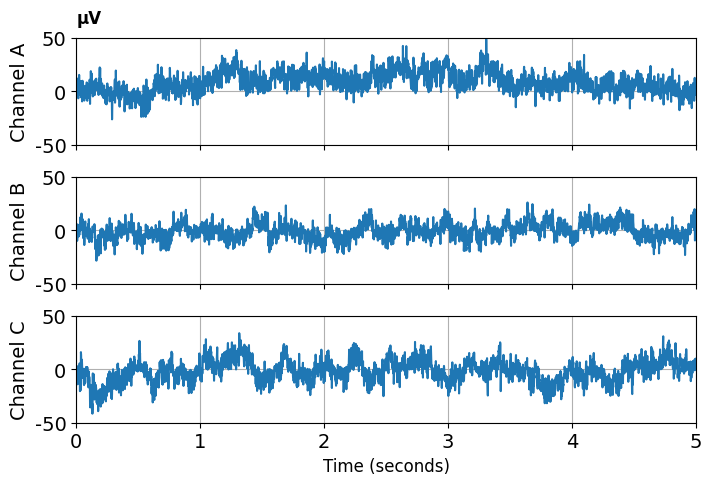

In [25]:
# Define the desired channels
desired_channels = [91, 87, 83]

# Convert the desired time range in seconds to indices
start_time_seconds = 0
end_time_seconds = 5  # 250 seconds
start_index = int(start_time_seconds * sampling_rate)
end_index = int(end_time_seconds * sampling_rate)

# Slice the LFP data
lfp_data_sliced = lfp_df.iloc[start_index:end_index]

# Select the desired channels
lfp_data_sliced_desired = lfp_data_sliced[desired_channels]

# Create a time array for the x-axis
time_array = np.arange(start_time_seconds, end_time_seconds, 1 / sampling_rate)[:len(lfp_data_sliced_desired)]

# Graph the three desired channels
# Your existing code for plotting
fig, ax = plt.subplots(len(desired_channels), 1, figsize=(8, 5), sharex=True, gridspec_kw={'hspace': 0.3})
y_labels = ['A', 'B', 'C']

for i, channel in enumerate(desired_channels):
    ax[i].plot(time_array, lfp_data_sliced_desired[channel])
    ax[i].set_ylabel('Channel {}'.format(y_labels[i]), fontsize=14)
    ax[i].set_xlim([start_time_seconds, end_time_seconds])
    ax[i].set_ylim([-.00005, .00005])
    ax[i].set_yticks([-.00005, 0, .00005])
    ax[i].set_yticklabels([-50, 0, 50])
     # Set y-axis tick font size
    ax[i].tick_params(axis='y', labelsize=14)
    ax[i].grid(True)
    if i == 0:
        ax[i].text(start_time_seconds, 0.00006, "µV", fontsize=12, va='bottom', ha='left', fontweight='bold') # Add the unit on the top left corner of the first graph

ax[-1].set_xlabel('Time (seconds)', fontsize=12)  # Set the x-axis label font size

# Set x-axis tick font size
for ax_ in ax:
    ax_.tick_params(axis='x', labelsize=14)

# Save the figure
save_path = '/Users/poggi/Documents/Maier Lab/Summer Figures/lfp_data_sliced_desired_zoomed.png'
plt.savefig(save_path)
plt.show()


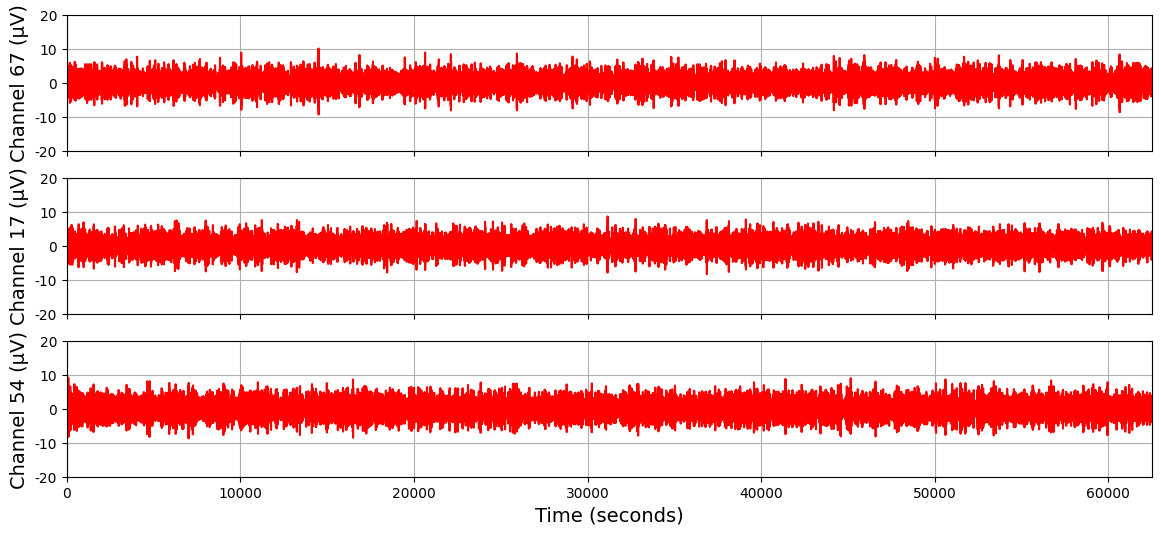

In [13]:
# Define the butter_bandpass_2 function
def butter_bandpass_2(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)

    # Apply bandpass filter to the entire DataFrame
    filtered_data = filtfilt(b, a, data, axis=0)

    return filtered_data

# Define the desired channels
desired_channels = [91, 87, 83]

# Convert the desired time range in seconds to indices
start_time_seconds = 0
end_time_seconds = 100  # 250 seconds
start_index = int(start_time_seconds * sampling_rate)
end_index = int(end_time_seconds * sampling_rate)

# Slice the LFP data
lfp_data_sliced = lfp_df.iloc[start_index:end_index]

# Apply bandpass filter to each channel separately
filtered_lfp_sliced_desired = lfp_data_sliced_desired.apply(butter_bandpass_2, lowcut=35, highcut=65, fs=sampling_rate, order=5)

# Define the desired channels
desired_channels = [91, 87, 83]

# Convert the desired time range in seconds to indices
start_time_seconds = 0
end_time_seconds = 100  # 250 seconds
start_index = int(start_time_seconds * sampling_rate)
end_index = int(end_time_seconds * sampling_rate)

# Slice the LFP data
lfp_data_sliced = lfp_df.iloc[start_index:end_index]

# Select the desired channels
lfp_data_sliced_desired = lfp_data_sliced[desired_channels]

# Retrieve the sampling rate from the NWB file
sampling_rate = nwb.electrode_groups['probeA'].lfp_sampling_rate

# Apply bandpass filter to each channel separately
filtered_lfp_sliced_desired = lfp_data_sliced_desired.apply(lambda channel_data: butter_bandpass_2(channel_data, lowcut=35, highcut=65, fs=sampling_rate, order=5))

# graph the three channels
fig, ax = plt.subplots(num_channels, 1, figsize=(14, 6), sharex=True)
for i in range(num_channels):
    ax[i].plot(filtered_lfp_sliced_desired.iloc[:, i], color = 'red')
    ax[i].set_ylabel('Channel {} (µV)'.format(random_channels[i]), fontsize=14)
    ax[i].set_xlim([start_index, end_index])
    ax[i].set_ylim([-.00002, .00002])
    ax[i].set_yticks([-.00002, -.00001, 0, .00001, .00002])
    ax[i].set_yticklabels([-20, -10, 0, 10, 20])
    ax[i].grid(True)

ax[-1].set_xlabel('Time (seconds)', fontsize=14)
# save figure
save_path = '/Users/poggi/Documents/Maier Lab/Summer Figures/filtered_lfp_sliced_gamma_butterworth.png'
plt.savefig(save_path)

             91            87            83
0  7.810179e-08  6.604875e-08  1.542913e-07
1  2.210979e-06  5.944621e-07  2.273894e-07
2  3.753922e-06  1.099669e-06  6.285366e-07
3  4.310392e-06  1.352468e-06  1.076618e-06
4  3.768173e-06  1.320162e-06  1.569531e-06


/var/folders/16/3sjk82b95wj4m_sct3hj3kmr0000gn/T/ipykernel_42646/2663510028.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([0,1,2,3,4,5], fontsize=12)  # Set x-axis tick fontsize to 12


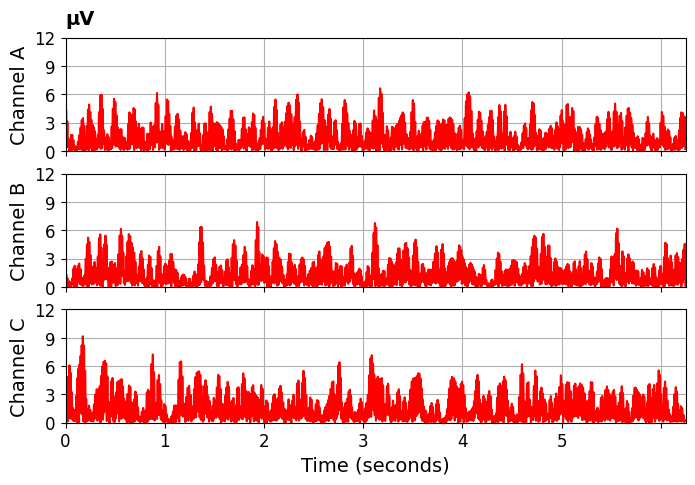

In [24]:
# Define the desired channels
desired_channels = [91, 87, 83]

# Convert the desired time range in seconds to indices
start_time_seconds = 0
end_time_seconds = 5  # 5 seconds
start_index = int(start_time_seconds * sampling_rate)
end_index = int(end_time_seconds * sampling_rate)

# Slice the LFP data
lfp_data_sliced = lfp_df.iloc[start_index:end_index]

# Select the desired channels
lfp_data_sliced_desired = lfp_data_sliced[desired_channels]

# Retrieve the sampling rate from the NWB file
sampling_rate = nwb.electrode_groups['probeA'].lfp_sampling_rate
# Apply bandpass filter to each of the random channels separately
filtered_lfp_sliced_desired = lfp_data_sliced_desired.apply(lambda x: bandpass_filter(x, lowcut=35, highcut=65, fs=sampling_rate))
print(filtered_lfp_sliced_desired.head())

# # graph the three channels
# fig, ax = plt.subplots(len(desired_channels), 1, figsize=(8, 5), sharex=True)
# for i, channel in enumerate(desired_channels):
#     ax[i].plot(filtered_lfp_sliced_desired.iloc[:, i], color='red')
#     ax[i].set_ylabel('Channel {} (µV)'.format(channel), fontsize=12)
#     ax[i].set_xlim([start_index, end_index])
#     ax[i].set_xticklabels([0,1,2,3,4,5])
#     ax[i].set_ylim([0, .000012])
#     ax[i].set_yticks([0, .000003, .000006, .000009, .000012])
#     ax[i].set_yticklabels([0, 3, 6, 9, 12])
#     ax[i].grid(True)
#
# ax[-1].set_xlabel('Time (seconds)', fontsize=12)
# # save figure
# save_path = '/Users/poggi/Documents/Maier Lab/Summer Figures/filtered_lfp_sliced_gamma_zoomed.png'
# plt.savefig(save_path)

fig, ax = plt.subplots(len(desired_channels), 1, figsize=(8, 5), sharex=True)
# Define the y-axis labels
y_labels = ['A', 'B', 'C']

for i, channel in enumerate(desired_channels):
    ax[i].plot(filtered_lfp_sliced_desired.iloc[:, i], color='red')
    ax[i].set_ylabel('Channel {}'.format(y_labels[i]), fontsize=14)  # Relabel the y-axis with 'A', 'B', and 'C'
    ax[i].set_xlim([start_index, end_index])
    ax[i].set_xticklabels([0,1,2,3,4,5], fontsize=12)  # Set x-axis tick fontsize to 12
    ax[i].set_ylim([0, .000012])
    ax[i].set_yticks([0, .000003, .000006, .000009, .000012])
    ax[i].set_yticklabels([0, 3, 6, 9, 12], fontsize=12)  # Set y-axis tick fontsize to 12
    ax[i].grid(True)

    if i == 0:
        # Add the "µV" label above the top left graph axes
        ax[i].text(start_index, 0.000013, "µV", fontsize=14, va='bottom', ha='left', fontweight='bold')

ax[-1].set_xlabel('Time (seconds)', fontsize=14)  # Set the x-axis label fontsize to 14

# Save figure
save_path = '/Users/poggi/Documents/Maier Lab/Summer Figures/filtered_lfp_sliced_gamma_zoomed.png'
plt.savefig(save_path)